# Finding if a Coin is Fair or Fake 

We consider the folowing problem: Given a sequence of coin tosses $X = \{x^{(n)}\}_{n=1\dots N}$, determine if the coin is fair or fake.

This can be cast as a model selection problem:

\begin{eqnarray}
\pi_1|m & \sim & \left\{ \begin{array}{cc} \delta(\pi_1 - 0.5) & m = 0\\ 0.5\mathcal{B}(\pi; a, b)+ 0.5\mathcal{B}(\pi; b,a) & m = 1 \end{array} \right.
\end{eqnarray}
For $n = 1\dots N$
\begin{eqnarray}
x^{(n)}| \pi_1 & \sim & \mathcal{BE}(x; \pi_1)
\end{eqnarray}

This model defines the following:
- The indicator $m$, that denotes if the coin is fake,
- What a fake coin is: a fake coin is one that has an arbitrary probability $\pi_1$ between $0$ and $1$. 
- What a fair coin is: a fair coin has $\pi_1 = 0.5$

We need to calculate the marginal likelihoods for $m=0$ and $m=1$
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X | \pi_1) p(\pi_1|m)
\end{eqnarray}

###### Not Fake
\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(X| \pi_1) \delta(\pi_1 - 0.5) \\
& = & \prod_{n=1}^N \left(\frac{1}{2}\right)^{x^{(n)}} \left(\frac{1}{2}\right)^{1-x^{(n)}} = \frac{1}{2^N}
\end{eqnarray}

###### Fake

\begin{eqnarray}
p(X| m) & = & \int d\pi_1 p(\pi_1; a, b) \prod_{n=1}^{N} p(x^{(n)}| \pi_1)  \\
& = &  \int d\pi_1 \left(\prod_{n=1}^N \left(1-\pi_1\right)^{1-x^{(n)}} \pi_1^{x^{(n)}} \right) \left(0.5\mathcal{B}(\pi; a, b)+ 0.5\mathcal{B}(\pi; b,a)\right) \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \left(0.5\int d\pi_1 \left(1-\pi_1\right)^{c_0+a-1} \pi_1^{c_1+b-1} + 0.5\int d\pi_1 \left(1-\pi_1\right)^{c_0+b-1} \pi_1^{c_1+a-1}\right) \\
& = & \frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \left(0.5\frac{\Gamma(c_0+a)\Gamma(c_1+b)}{\Gamma(c_0 + c_1 +a + b)}
+0.5\frac{\Gamma(c_0+b)\Gamma(c_1+a)}{\Gamma(c_0 + c_1 +a + b)}\right)\\
& = & 0.5\frac{\Gamma(a + b)}{\Gamma(a)\Gamma(b)} \left(\frac{\Gamma(c_0+a)\Gamma(c_1+b)+\Gamma(c_0+b)\Gamma(c_1+a)}{\Gamma(c_0 + c_1 +a + b)}\right)
\end{eqnarray}

In [17]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.special as sps

def log_odds(c_0, c_1, a, b):
    # Total number of tosses
    N = c_0 + c_1
    
    M_fair = N*np.log(0.5)
    M_fake =np.log(0.5)+ sps.gammaln(a+b) - sps.gammaln(a) - sps.gammaln(b) + np.log((sps.gamma(c_0+a) * sps.gamma(c_1+b))+ sps.gamma(c_0+b) * sps.gamma(c_1+a))-sps.gammaln(N+a + b) 
    return M_fair - M_fake

# Number of Zeros observed
c_0 = 6
# Number of Ones
c_1 = 1

# Prior
a = 20
b = 3



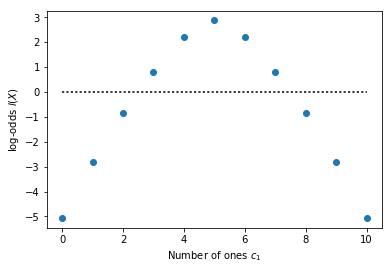

In [18]:
a = 20
b = 3
N = 10

l = np.zeros(N+1)

for c in range(0,N+1):
    l[c] = log_odds(N-c, c, a, b)

plt.plot(range(0,N+1), l, 'o')
plt.plot(range(0,N+1), np.zeros(N+1), 'k:')
ax = plt.gca()
ax.set_xlabel('Number of ones $c_1$')
ax.set_ylabel('log-odds $l(X)$')
plt.show()

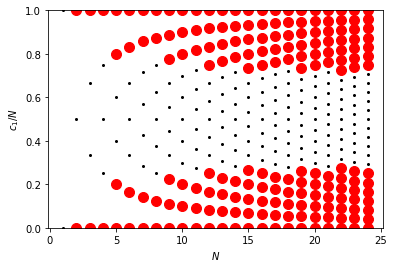

In [20]:
a = 20
b = 3

for N in range(1, 25):

    l = np.zeros(N+1)

    for c in range(0,N+1):
        l[c] = log_odds(N-c, c, a, b)
    
    
    idx = np.where( np.array(l)<0 )
    p = np.arange(0,N+1)/N
    plt.plot(N*np.ones_like(p), p, '.k',markersize=4)    
    plt.plot(N*np.ones_like(p[idx]), p[idx], '.r',markersize=20)
    

ax = plt.gca()
ax.set_ylim((0,1))
ax.set_xlabel('$N$')
ax.set_ylabel('$c_1/N$')
plt.show()

## Change Point

The problem can be converted into following model,

\begin{eqnarray}
\pi_1 & \sim &\mathcal{B}(1,1)\\
\pi_2 & \sim &\mathcal{B}(1,1)\\
x_t & \sim & \left\{ \begin{array}{cc} BE(x_t:\pi_1) & t < n\\BE(x_t:\pi_2) & t >= n \end{array} \right.
\end{eqnarray}

This model defines the following:

- $n$ denoting the index of change point and dom(n)={1,...,T} where T is the number of tosses.

We need to calculate the posterior probability, if the index of change point is c  

\begin{eqnarray}
p(n=c | X) & = & \frac{p(X |n=c)p(n=c)}{p(X)}\\
& = & \frac{\int \int d\pi_1 d\pi_2 p(X,\pi_1,\pi_2,n=c)}{p(X)}\\
& = & \frac{\int \int d\pi_1 d\pi_2p(X,\pi_1,\pi_2| n=c)p(n=c)}{\sum_{i=1}^{T}\int \int d\pi_1 d\pi_2p(X,\pi_1,\pi_1 |n=i)P(n=i)}\\
& = & \frac{\int \int d\pi_1 d\pi_2p(x_1,...,x_{c-1}|\pi_1)p(x_c,...,x_T|\pi_2)p(n=c)}{\sum_{i=1}^{T}\int \int d\pi_1 d\pi_2p(x1,...x_{i-1}|\pi_1),p(x_i,...,x_T),|\pi_2)p(n=i)}\\
& = & \frac{\frac{1}{T} \int \int d\pi_1 d\pi_2\prod_{i=1}^{c-1} (1-\pi_1)^{1-x(i)}(\pi_1)^{x(i)}\prod_{i=c}^{T} (1-\pi_2)^{1-x(i)}(\pi_2)^{x(i)}}{\frac{1}{T} \int \int d\pi_1 d\pi_2 \sum_{m=1}^{T} \prod_{i=1}^{m-1} (1-\pi_1)^{1-x(i)}(\pi_1)^{x(i)}\prod_{i=m}^{T} (1-\pi_2)^{1-x(i)}(\pi_2)^{x(i)}}\\
\end{eqnarray}

Let's define $\lambda_{00}$ as the number of zeros and  $\lambda_{10}$ number of ones tossed before $\lambda$'th toss. Also define  $\lambda_{01}$ as the number of zeros and  $\lambda_{11}$ number of ones tossed after $\lambda$'th toss.

The posterior probability becomes,
\begin{eqnarray}
p(n=c| X) & = & \frac{\int\int d\pi_1d\pi_2(1-\pi_1)^{c_{00}}(\pi_1)^{c_{01}} (1-\pi_2)^{c_{01}}(\pi_2)^{c_{11}}}{\int\int d\pi_1d\pi_2\sum_{m=1}^{T} (1-\pi_1)^{m_{00}}(\pi_1)^{m_{01}} (1-\pi_2)^{m_{10}}(\pi_2)^{m_{11}}}\\
\end{eqnarray}

Finally we can write down the integrals as gamma functions.

\begin{eqnarray}
p(n=c| X)& = & \frac{\Gamma(c_{00}+1)\Gamma(c_{01}+1) \Gamma(c_{10}+1)\Gamma(c_{11}+1)}{\Gamma(c_{00}+c_{01}+2)\Gamma(c_{10}+c_{11}+2)}\frac{1}{A}
\end{eqnarray}

where 

\begin{eqnarray}
A=\frac{1} {\sum_{m=1}^{T} \frac{\Gamma(m_{00}+1)\Gamma(m_{01}+1)}{\Gamma(m_{00}+m_{01}+2)} \frac{\Gamma(m_{10}+1)\Gamma(m_{11}+1)}{\Gamma(m_{10}+m_{11}+2)}}
\end{eqnarray}


Since A is only a normalization constant, we can also write

\begin{eqnarray}
p(n=c| X) & \propto & \frac{\Gamma(c_{00}+1)\Gamma(c_{01}+1)}{\Gamma(c_{00}+c_{01}+2)} \frac{\Gamma(c_{10}+1)\Gamma(c_{11}+1)}{\Gamma(c_{10}+c_{11}+2)}
\end{eqnarray}


Most prabable point: 25
Probability: 0.397354855371
Log Probability: -0.92292555529


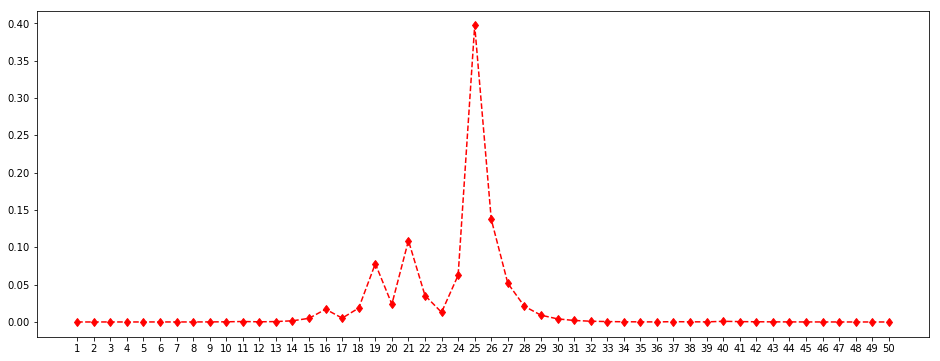

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sps

tosses=[0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]
ones=[0]
one_count=0


for i in range(0,len(tosses)) :
    if tosses[i]==1 :
        one_count+=1
    ones.append(one_count);    
        

def prob(c):
    c_01=ones[c-1]
    c_00=c-1-c_01
    c_11=ones[len(tosses)]-ones[c-1]
    c_10=len(tosses)-c_01-c_00-c_11
    pr=(sps.gamma(c_00+1)*sps.gamma(c_01+1)*sps.gamma(c_10+1)*sps.gamma(c_11+1))/(sps.gamma(c_00+c_01+2)*sps.gamma(c_10+c_11+2))
    return pr
    


posteriors=[]

for i in range (1,len(ones)):
    posteriors.append(prob(i))
    
posteriors/=sum(posteriors)
print("Most prabable point:",np.argmax(posteriors)+1)
print("Probability:",np.max(posteriors))
print("Log Probability:",np.log(np.max(posteriors)))


n= np.arange(1,len(ones),1)
plt.figure(figsize=(16,6))
plt.xticks(n)
plt.plot(n, posteriors, "rd--")
#plt.plot(n, np.log(posteriors),  marker='.')

plt.show()

